In [1]:

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"
OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/variants_init_knn_kparam_30/"
DONOR = 0

cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"

cloneID = "0_C6"


In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch

In [4]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


out_f = join(OUTDIR, f"donor{DONOR}")


In [ ]:
#donor_vars = AF_df>0.9

In [5]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta

,donor,cloneID,condition,clusterID
TTAGCGAGTGGTGGTA-1_Flt3l,0,0_C6,Flt3l,macrophage
GTCTACCAGTGTCCCG-1_Input,0,0_C8,Input,neutrophil B
TTACGGAAGTCTGTGT-1_Flt3l,0,0_C4,Flt3l,neutrophil
GTGTGATCAGCGCGTT-1_Input,0,0_C2,Input,MPP/CMP/GMP
AGGCGAACATTGCCTC-1_Input,0,0_C2,Input,MPP/CMP/GMP B
...,...,...,...,...
TTTGGCCTCTAGCAAC-1_Input,0,0_C0,Input,MPP/CMP/GMP
AGATTCGTCGAGGTCC-1_Flt3l,0,0_C0,Flt3l,eosonophil
AAAGATGGTCAACAGG-1_Control,0,0_C0,Control,neutrophil B
ACCATCCAGACTCTTG-1_Control,0,0_C0,Control,meg/erythroid


In [6]:
curr_cells = cells_meta.loc[cells_meta["cloneID"] == cloneID]

## Filter for clone

In [7]:
AF_df = AF_df.loc[:,curr_cells.index]
DP_df = DP_df.loc[:,curr_cells.index]

In [8]:
AD_df = (np.round(AF_df*DP_df)).astype(int)

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


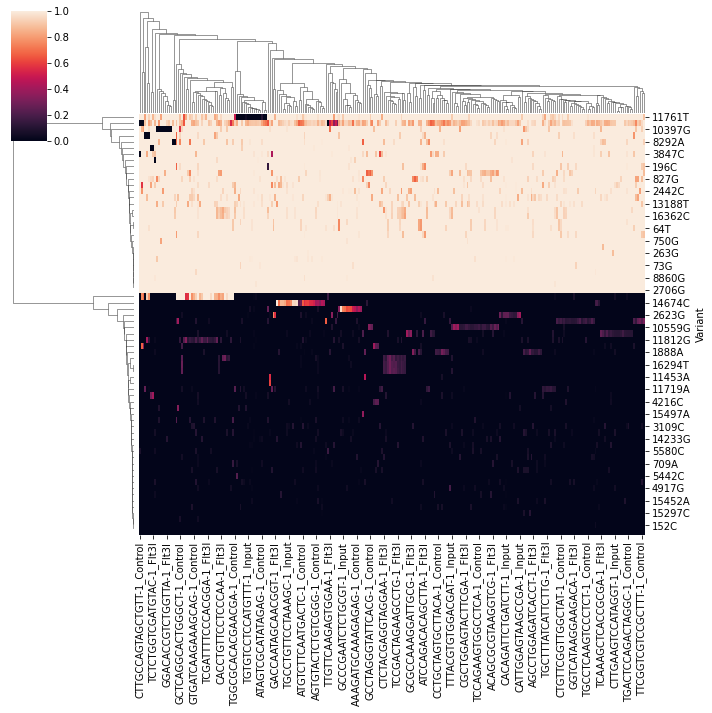

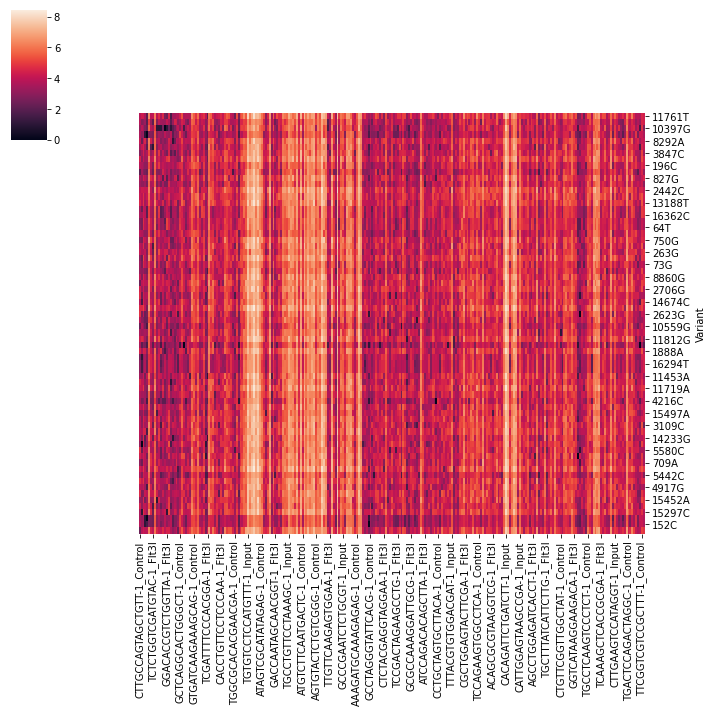

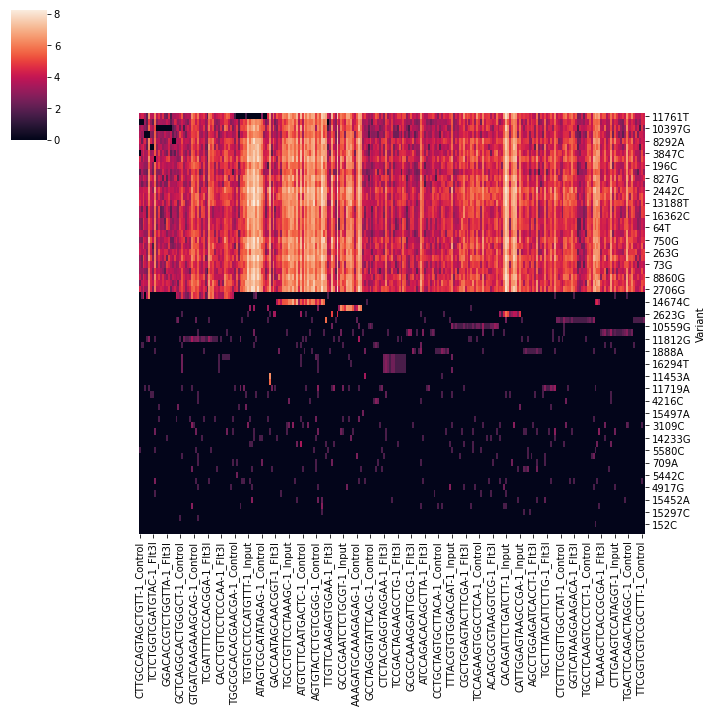

In [9]:
g = sns.clustermap(AF_df)
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
sns.clustermap(np.log2(1+DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)

sns.clustermap(np.log2(1+AD_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)

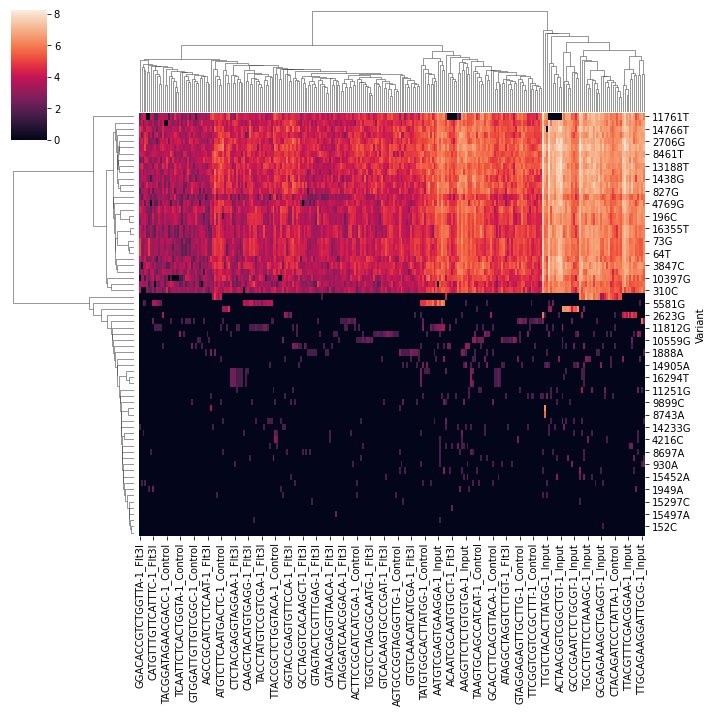

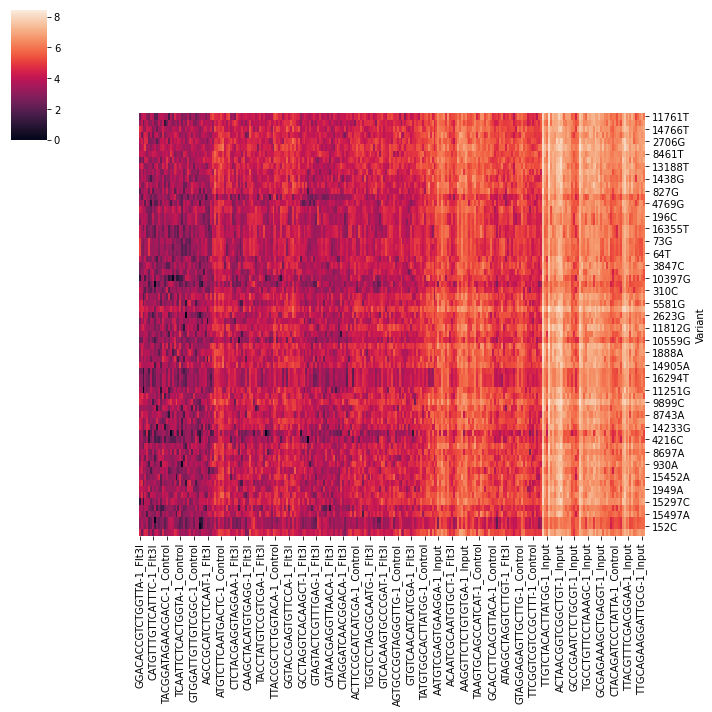

In [10]:
g = sns.clustermap(np.log2(1+AD_df))
inds = g.dendrogram_row.dendrogram["leaves"]
cols = g.dendrogram_col.dendrogram["leaves"]
sns.clustermap(np.log2(1+DP_df.iloc[inds,cols]), row_cluster=False, col_cluster=False)

## Correlate AF with Coverage for each variant

In [11]:
AF_df.head()

,TTAGCGAGTGGTGGTA-1_Flt3l,TAAGTGCAGTGAAGGA-1_Flt3l,GTGGATTGTTGTCGGC-1_Control,TGTAGCAGTCGATAGG-1_Flt3l,GGGCCATCAACTAGAA-1_Flt3l,CACTAAGAGGTTCGAG-1_Control,AGACAAACATTCACGA-1_Control,TCTATTGCATCTCACC-1_Flt3l,CATTCCGGTAGGGTTG-1_Input,GCACCTTCACGTTACA-1_Control,...,CTTCCAGCAGAAAGAG-1_Flt3l,TTACCCGTCACTCCCA-1_Control,TAGGTCACAAGGCTTT-1_Input,ACAAAGATCCTAAAGC-1_Input,TAATTCCGTGCCAAGA-1_Flt3l,ACTGTCCGTTACGGAG-1_Flt3l,GCGAGTCTCTTTCGAT-1_Input,AAGGTTCTCTGTGTGA-1_Input,TTGCACCAGATTAGAC-1_Flt3l,GAGTGAGAGGTCGTTT-1_Flt3l
Variant,,,,,,,,,,,,,,,,,,,,,
10397G,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.96,...,1.0,1.0,1.0,1.0,1.0,0.904762,1.0,1.0,1.0,1.0
10463C,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10559G,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10589A,1.0,1.0,1.0,1.0,1.0,0.900000,1.0,1.0,1.0,1.00,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0
11251G,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
AF_long = AF_df.reset_index().melt(var_name="cell", id_vars=["Variant"], value_name="AF")
AF_long

DP_long = DP_df.reset_index().melt(var_name="cell", id_vars=["Variant"], value_name="DP")
DP_long

df_long = pd.merge(AF_long, DP_long, on=["cell", "Variant"])
print(df_long.shape)
df_long.head()

,Variant,cell,AF
0,10397G,TTAGCGAGTGGTGGTA-1_Flt3l,1.0
1,10463C,TTAGCGAGTGGTGGTA-1_Flt3l,0.0
2,10559G,TTAGCGAGTGGTGGTA-1_Flt3l,0.0
3,10589A,TTAGCGAGTGGTGGTA-1_Flt3l,1.0
4,11251G,TTAGCGAGTGGTGGTA-1_Flt3l,0.0
...,...,...,...
17743,8697A,GAGTGAGAGGTCGTTT-1_Flt3l,0.0
17744,8743A,GAGTGAGAGGTCGTTT-1_Flt3l,0.0
17745,8860G,GAGTGAGAGGTCGTTT-1_Flt3l,1.0
17746,930A,GAGTGAGAGGTCGTTT-1_Flt3l,0.0


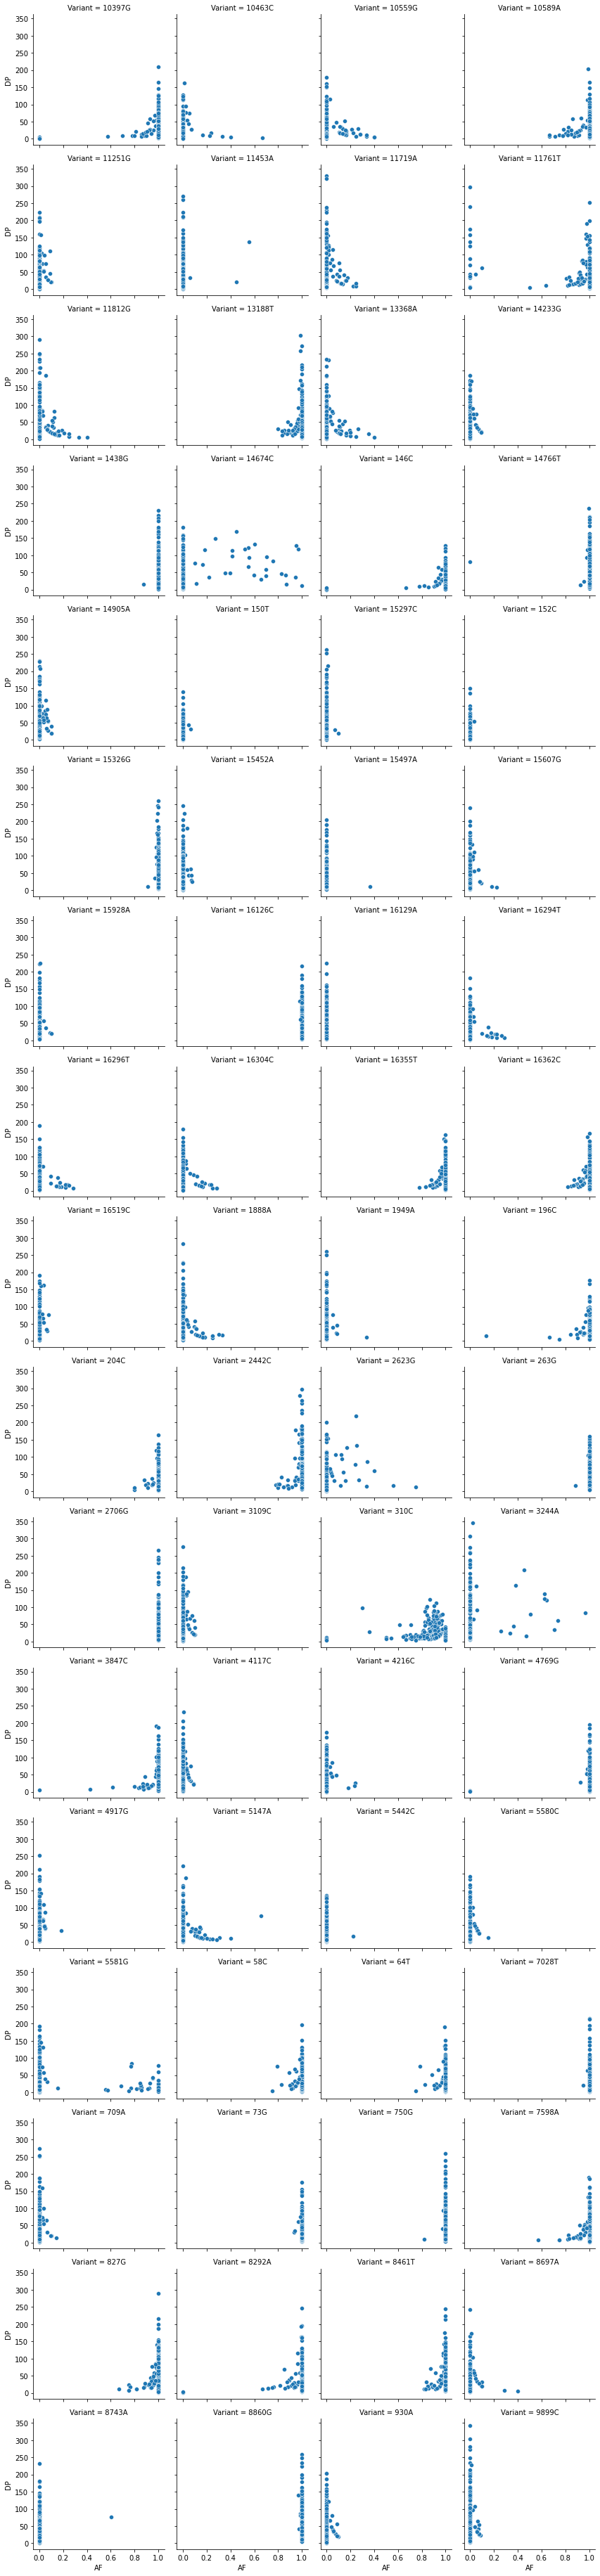

In [16]:
%matplotlib inline
g = sns.FacetGrid(col="Variant", col_wrap=4, data=df_long)
g.map_dataframe(sns.scatterplot, x="AF", y="DP")

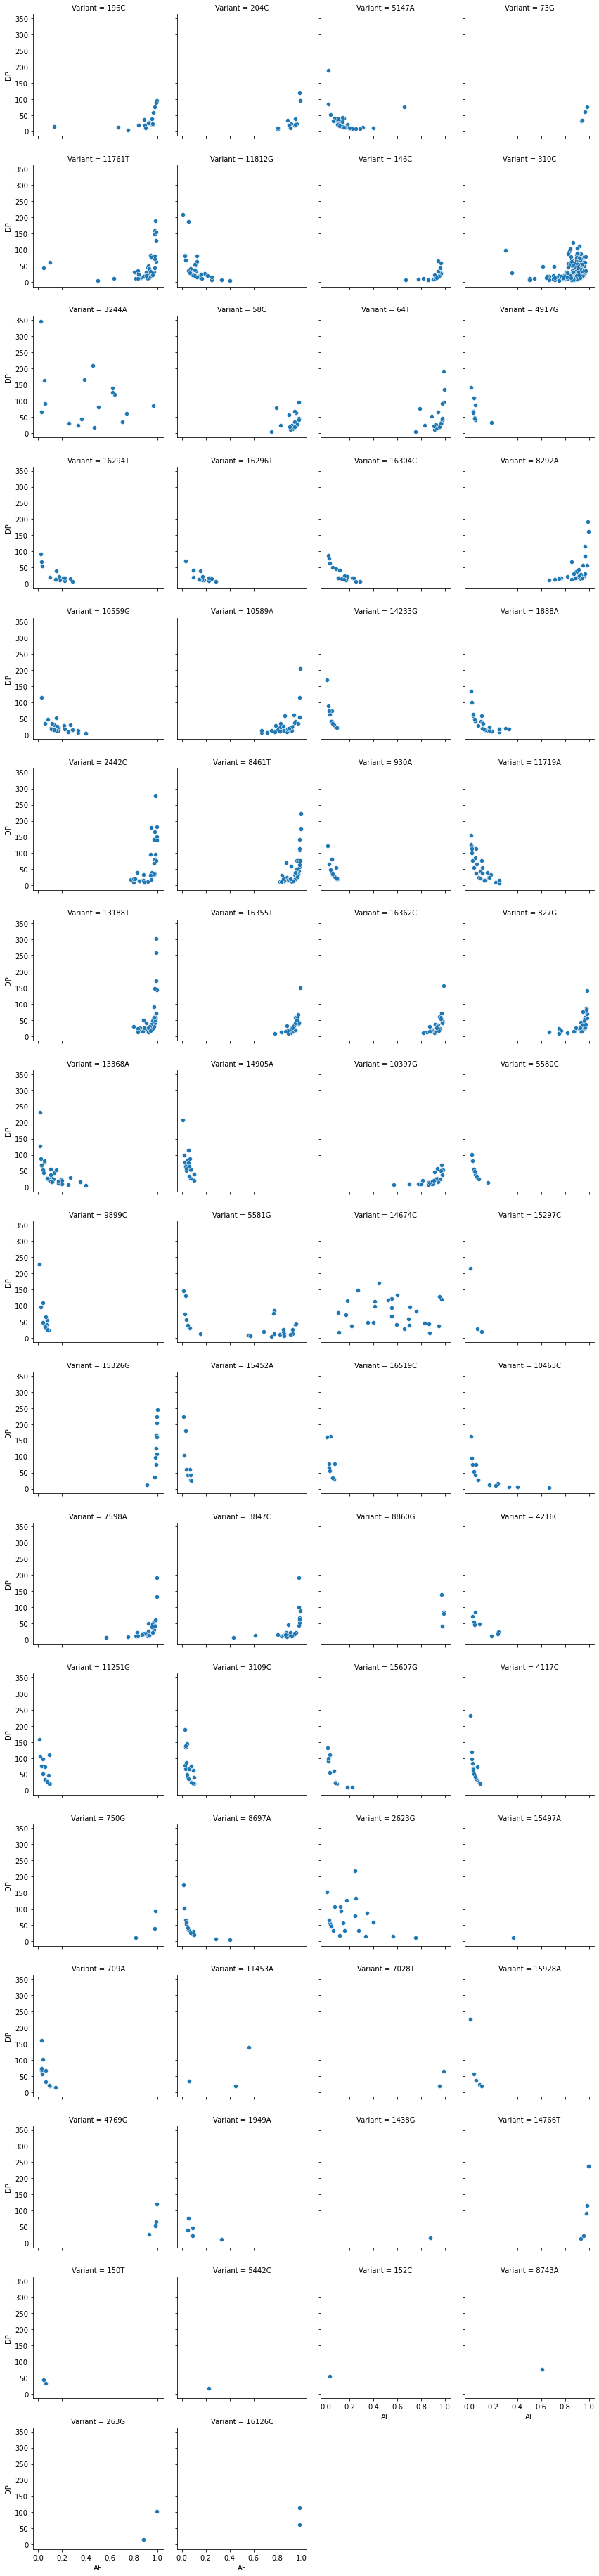

In [18]:
%matplotlib inline
# Remove the 0's and 1's
g = sns.FacetGrid(col="Variant", col_wrap=4, data=df_long.loc[~((df_long["AF"] == 0) | (df_long["AF"] == 1))])
g.map_dataframe(sns.scatterplot, x="AF", y="DP")

## Remove donor-specific variants